In [111]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import utils

In [324]:
METHODS = ['SKOPT','BASINHOPPING','RANDOM','LSTM-MIN-RBF', 'LSTM-MIN-MATERN32']


SKOPT found : -49.411499


FileNotFoundError: [Errno 2] No such file or directory: './airfoil-opt-result/normalize-1/basinhopping-samples_y.npy'

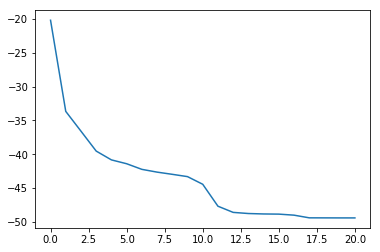

In [333]:
# METHODS = ['SKOPT-GP', 'SKOPT-GBRT', 'RANDOM', 'LSTM-MIN']

def load_data(method, normalization):
    output_dir = utils.loadConfig()['airfoil_optimization']['output_dir']
    filename = '%s/normalize-%d/%s-samples_y.npy' % (output_dir, normalization, method)
    sample_y = np.load(filename)
    return sample_y

def plot_data(normalization):
    
    for i in METHODS:
        y = utils.average_min_found_values_across_rows(load_data(i.lower(), normalization ))
        print('%s found : %f' % (i,y[-1]))
        if i == 'RANDOM':
            i = 'UNIFORM-SAMPLING'
        elif i == 'SKOPT':
            i = 'SKOPT-GP'
        if i in ['LSTM-MIN-MATERN32', 'LSTM-MIN-RBF'] :
            plt.plot(y, label=i, marker='o')
        else:
            plt.plot(y, label=i)
    plt.xticks(range(0,21,2))
    plt.ylabel('$-10^{%.0f}\\cdot L/G$' % (-np.log10(normalization)) )
    plt.xlabel('Evaluation Step')
#     plt.legend()

plot_data(normalization=1)
plt.legend()

SKOPT found : -34.539121
RANDOM found : -30.198641
LSTM-MIN-RBF found : -29.146328


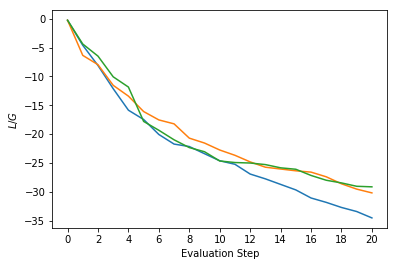

In [266]:
plot_data(normalization=1)
plt.ylabel('$L/G$')

In [340]:
import matplotlib.pylab as pylab
params = {
    'axes.labelsize': 'xx-large',
    'xtick.labelsize':'xx-large',
    'ytick.labelsize':'xx-large'
}
pylab.rcParams.update(params)

SKOPT found : -49.411499
BASINHOPPING found : -50.157460
RANDOM found : -48.933891
LSTM-MIN-RBF found : -37.439562
LSTM-MIN-MATERN32 found : -39.471147
----
SKOPT found : -0.521893
BASINHOPPING found : -0.517854
RANDOM found : -0.540635
LSTM-MIN-RBF found : -0.519242
LSTM-MIN-MATERN32 found : -0.520202
----


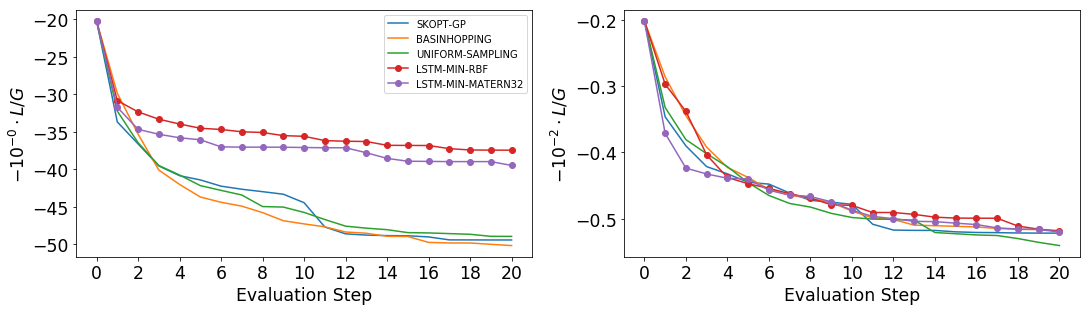

In [343]:
count = 1
plt.figure(figsize=(18,10))
for i in [1,100]:
    plt.subplot(2,2,count)
    plot_data(normalization=i)
    print('----')
    if count == 1:
        plt.legend()
    count = count + 1
# plt.savefig('airfoil-opt.svg')

In [159]:
def plot_1_over_norm(method):
    output_dir = utils.loadConfig()['airfoil_optimization']['output_dir']
    filename = '%s/normalize-1-over/%s-samples_y.npy' % (output_dir, method)
    sample_y = np.load(filename)
    return sample_y
sy_one_over = plot_1_over_norm('lstm-min-rbf')

In [161]:
xx = utils.average_min_found_values_across_rows(sy_one_over)

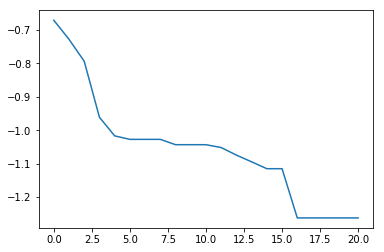

In [170]:
plt.plot(xx)

In [300]:
def plot_invalid_points(normalization):
    
    for i in METHODS:
        dd = load_data(i.lower(), normalization )
        y = np.sum(dd == 1.0 / normalization, axis=0)
        print(y)
        if i == 'LSTM-MIN-MATERN32':
            plt.plot(y, label=i, marker='o')
        else:
            plt.plot(y, label=i)
    plt.title('Normalized by %d' % normalization)
    plt.xticks(range(0,21,2))
#     plt.yticks(np.arange(0,100,0.2))
    plt.ylabel('Invalid Foil Count ')
    plt.xlabel('Evaluation Step')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


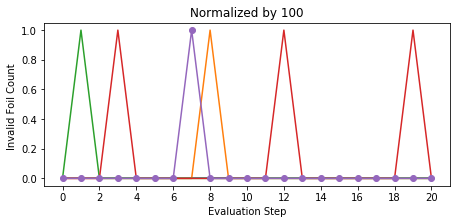

In [328]:
plt.figure(figsize=(16,3))
# plt.subplot(1,2,1)
# plot_invalid_points(1)
# plt.legend()

plt.subplot(1,2,2)
plot_invalid_points(100)

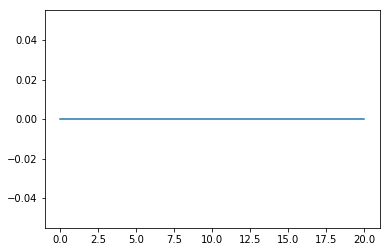

In [263]:
dd = load_data( 'RANDOM', 100 )
plt.plot( np.mean(dd == 0.01, axis=0) )

In [303]:
dd = load_data( 'RANDOM', 1 )
dd.shape

(100, 21)